In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from math import sqrt
import statsmodels.api as sm

In [16]:
clv=pd.read_csv("AutoInsurance.csv")

In [17]:
clv.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [19]:
clv.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [20]:
clv.describe(include="all")

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,10/1/2011,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [21]:
clv.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


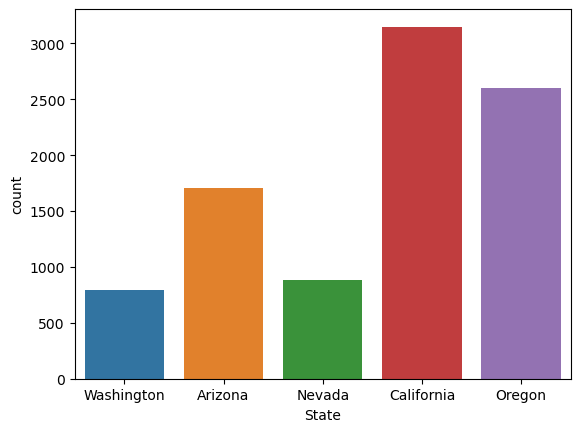

In [22]:
sns.countplot(x="State",data=clv)
plt.show()

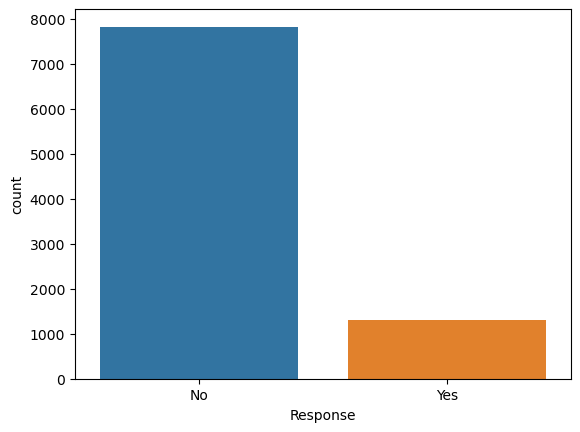

In [23]:
sns.countplot(x="Response",data=clv)
plt.show()

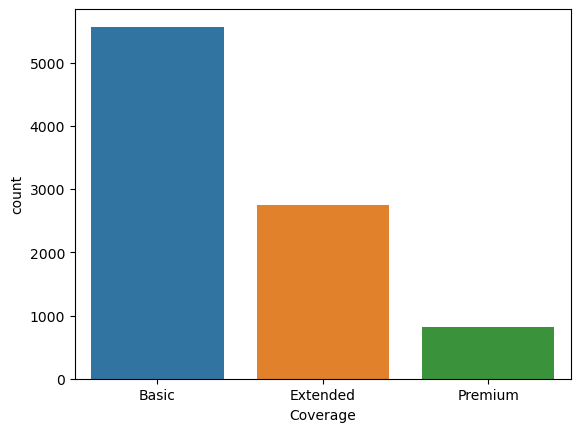

In [24]:
sns.countplot(x="Coverage",data=clv)
plt.show()

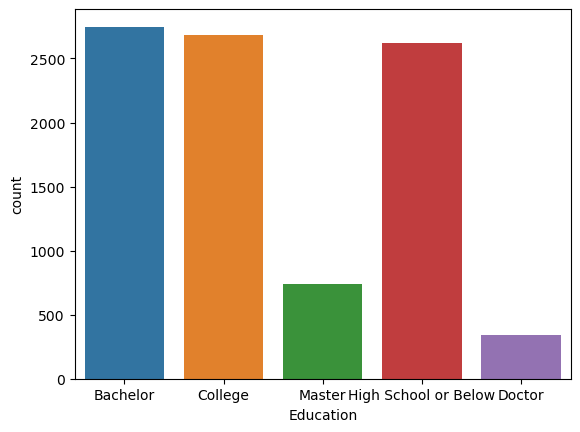

In [25]:
sns.countplot(x="Education",data=clv)
plt.show()

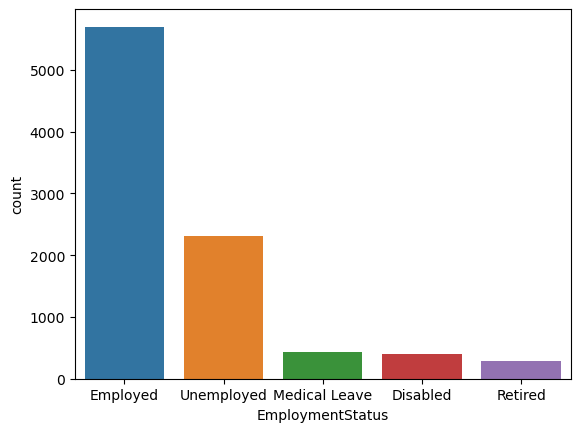

In [26]:
sns.countplot(x="EmploymentStatus",data=clv)
plt.show()

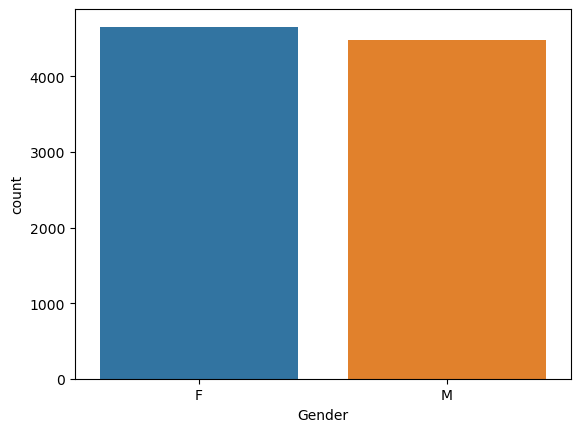

In [27]:
sns.countplot(x="Gender",data=clv)
plt.show()

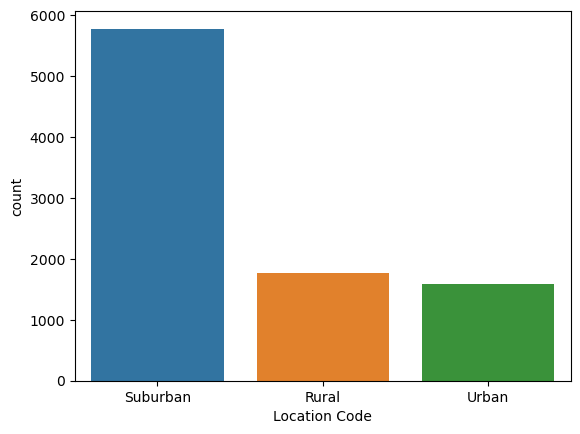

In [28]:
sns.countplot(x="Location Code",data=clv)
plt.show()

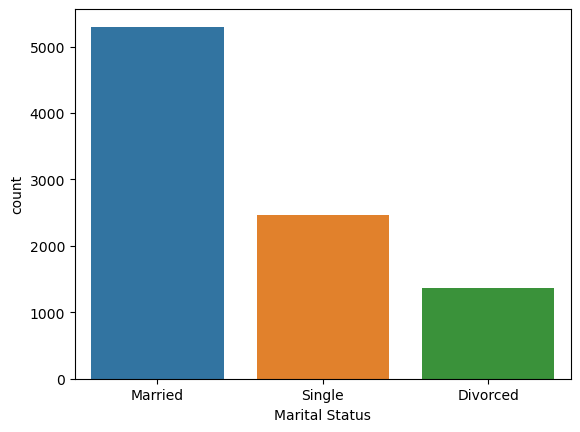

In [29]:
sns.countplot(x="Marital Status",data=clv)
plt.show()

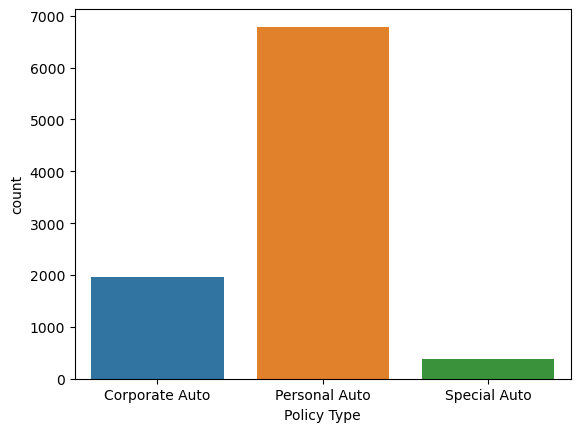

In [30]:
sns.countplot(x="Policy Type",data=clv)
plt.show()

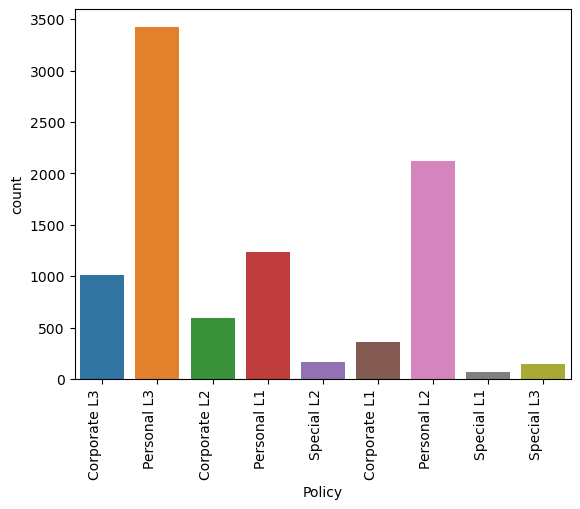

In [31]:
sns.countplot(x="Policy",data=clv)
plt.xticks(rotation=90, ha="right")
plt.show()

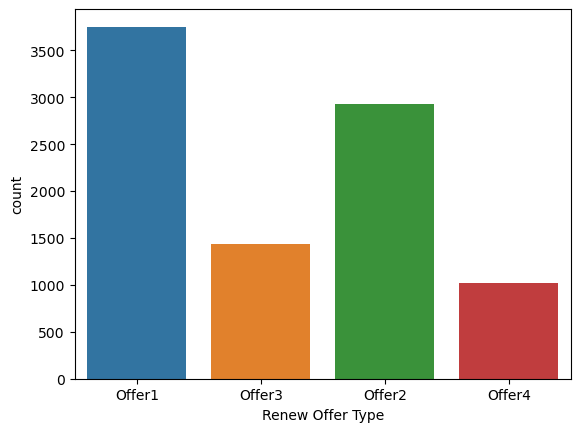

In [32]:
sns.countplot(x="Renew Offer Type",data=clv)
plt.show()

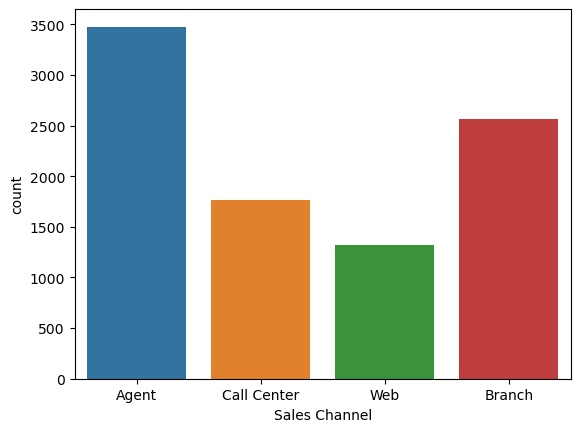

In [33]:
sns.countplot(x="Sales Channel",data=clv)
plt.show()

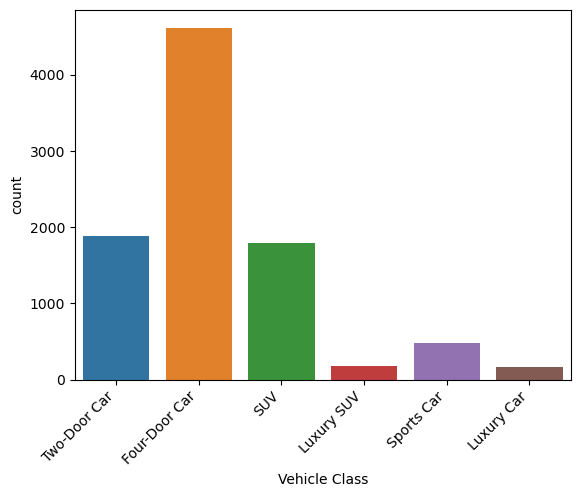

In [37]:
sns.countplot(x="Vehicle Class",data=clv)
plt.xticks(rotation=45, ha="right")
plt.show()

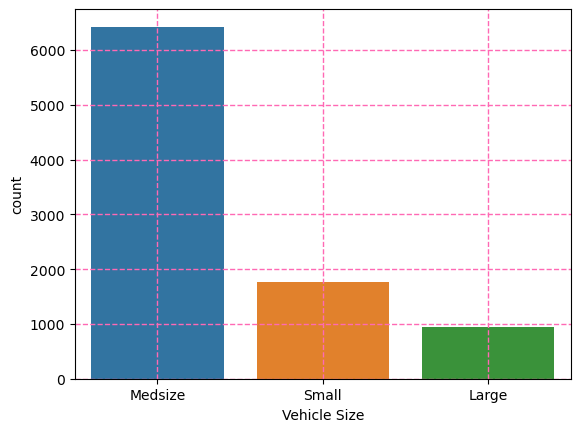

In [39]:
sns.countplot(x="Vehicle Size",data=clv)
plt.grid(color = 'hotpink', linestyle = '--', linewidth = 1.0)
plt.show()

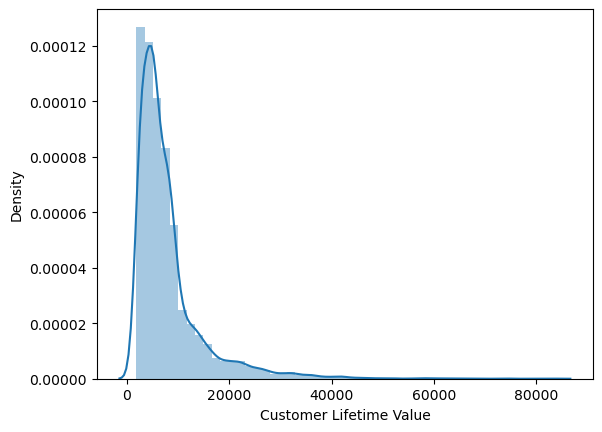

In [40]:
sns.distplot(clv["Customer Lifetime Value"])
plt.show()

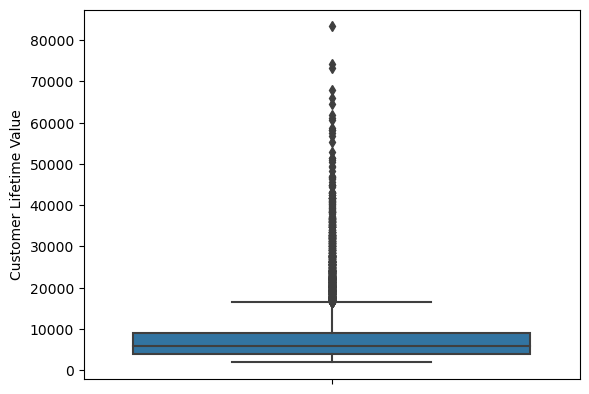

In [41]:
sns.boxplot(y="Customer Lifetime Value", data=clv)
plt.show()

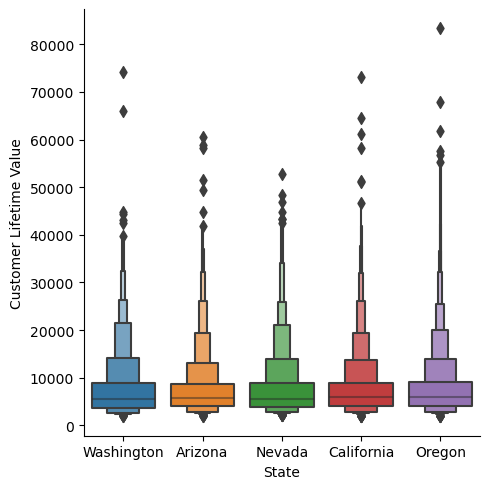

In [42]:
sns.catplot(x="State", y="Customer Lifetime Value", kind="boxen",data=clv)

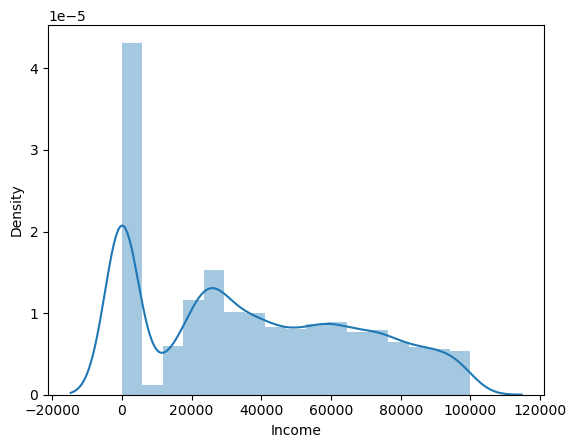

In [43]:
sns.distplot(df["Income"])
plt.show()

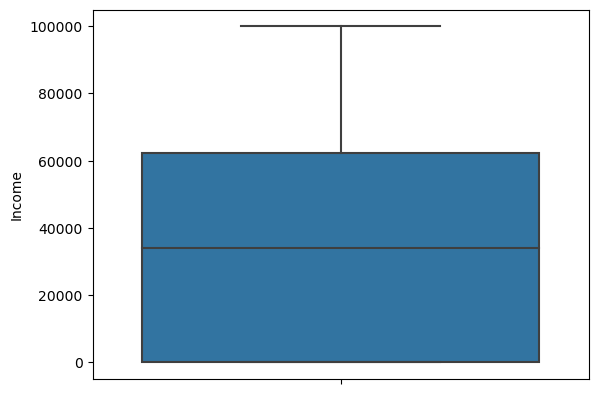

In [44]:
sns.boxplot(y="Income", data=clv)
plt.show()

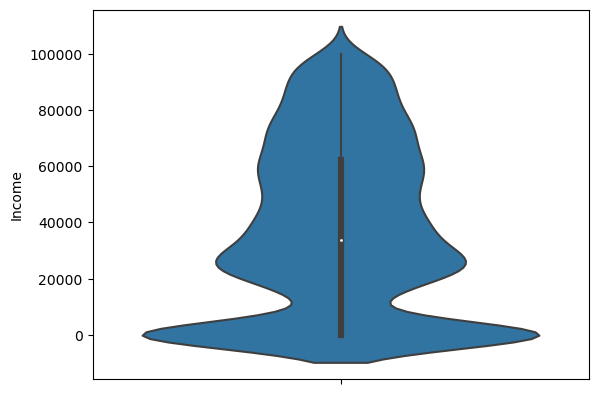

In [45]:
sns.violinplot(y="Income", data=clv)
plt.show()

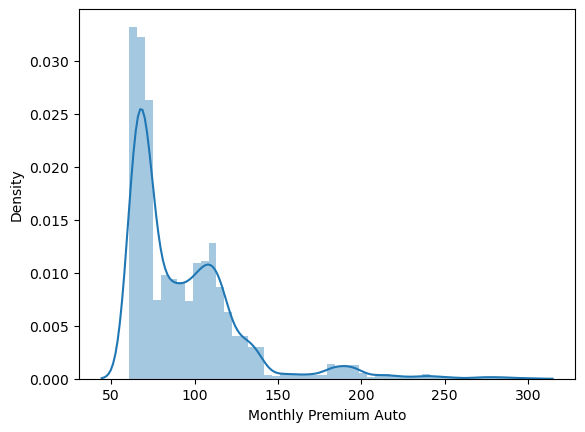

In [46]:
sns.distplot(clv["Monthly Premium Auto"])
plt.show()

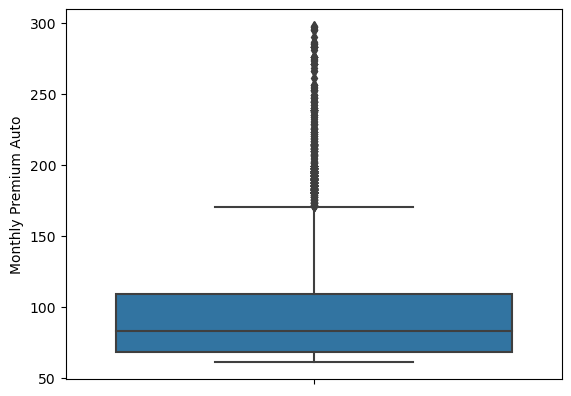

In [47]:
sns.boxplot(y="Monthly Premium Auto", data=clv)
plt.show()

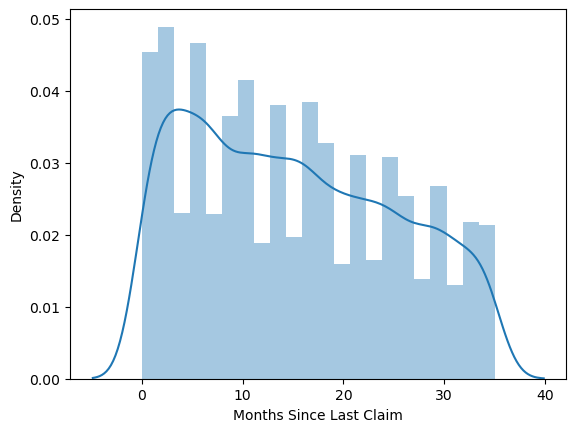

In [48]:
sns.distplot(clv["Months Since Last Claim"])
plt.show()

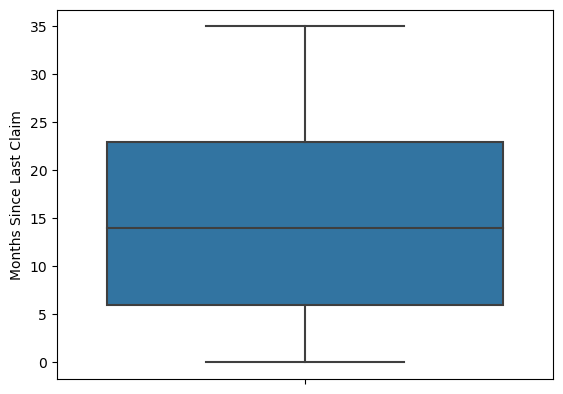

In [49]:
sns.boxplot(y="Months Since Last Claim", data=clv)
plt.show()

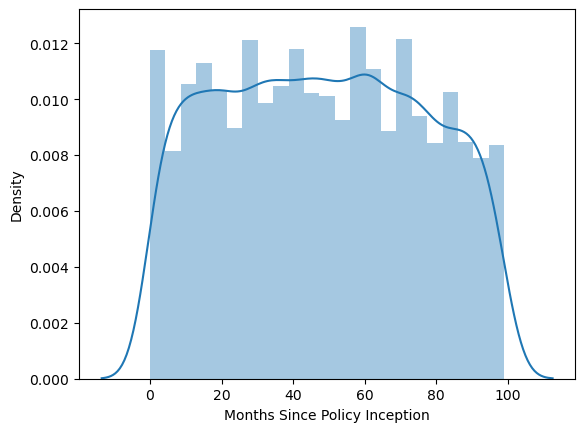

In [50]:
sns.distplot(clv["Months Since Policy Inception"])
plt.show()

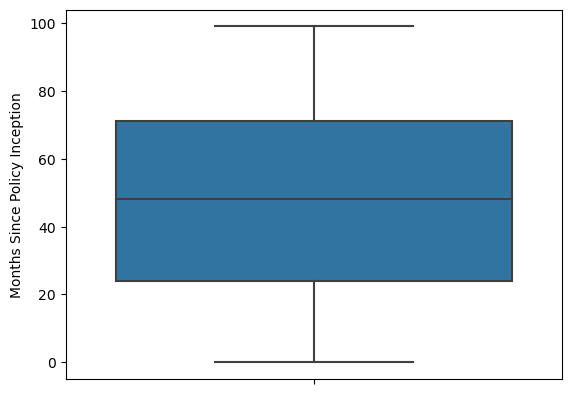

In [51]:
sns.boxplot(y="Months Since Policy Inception", data=clv)
plt.show()

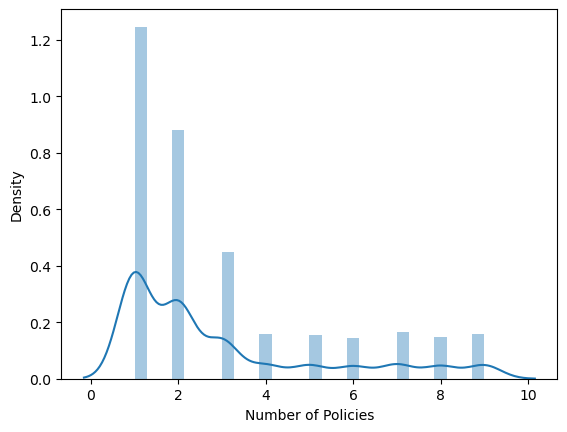

In [52]:
sns.distplot(clv["Number of Policies"])
plt.show()

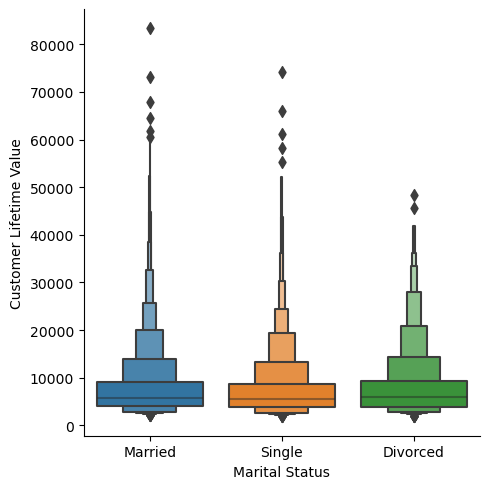

In [54]:
sns.catplot(data=clv,x="Marital Status", y="Customer Lifetime Value", kind="boxen")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Washington'),
  Text(1, 0, 'Arizona'),
  Text(2, 0, 'Nevada'),
  Text(3, 0, 'California'),
  Text(4, 0, 'Oregon')])

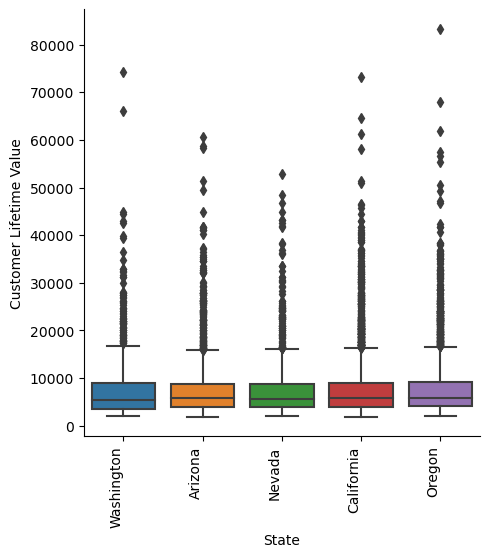

In [55]:
sns.catplot(data=clv,x="State", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=90, ha="right")


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

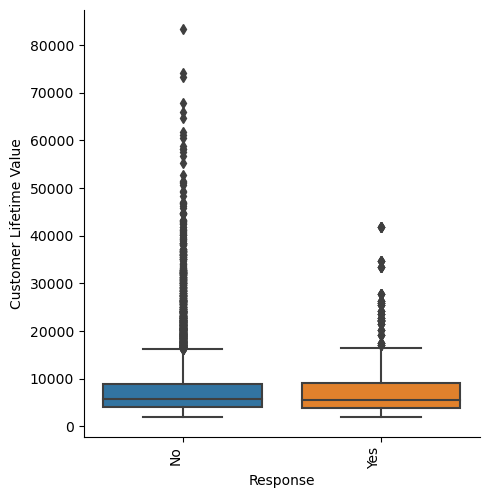

In [56]:
sns.catplot(data=clv,x="Response", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Basic'), Text(1, 0, 'Extended'), Text(2, 0, 'Premium')])

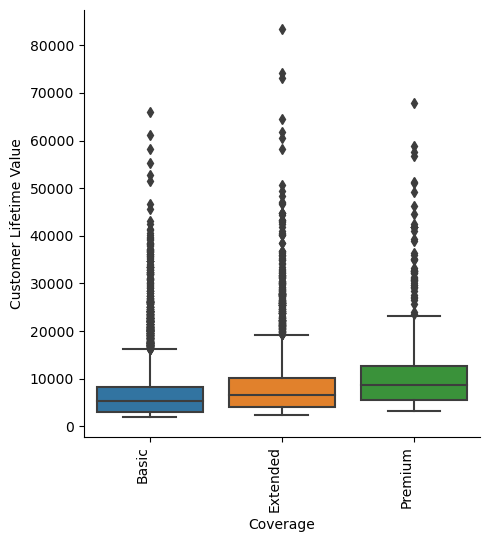

In [57]:
sns.catplot(data=clv, x="Coverage", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bachelor'),
  Text(1, 0, 'College'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'High School or Below'),
  Text(4, 0, 'Doctor')])

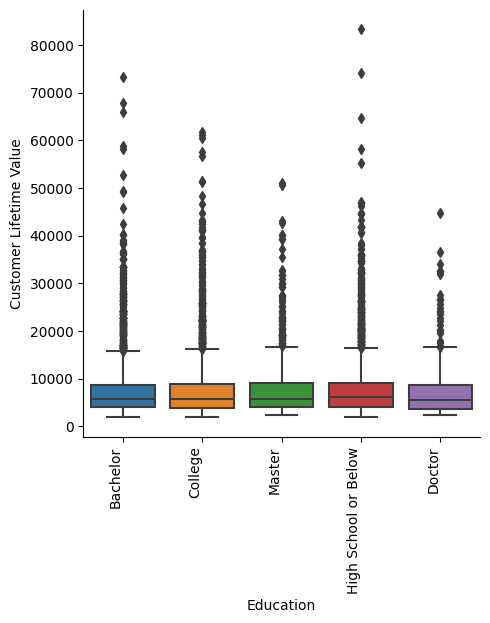

In [46]:
sns.catplot(data=df,
    x="Education", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

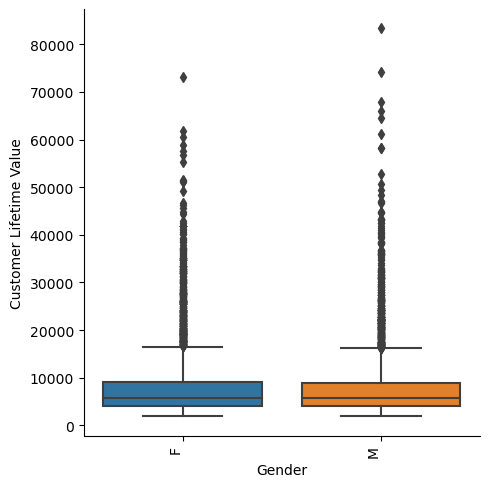

In [58]:
sns.catplot(data=clv,x="Gender", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Suburban'), Text(1, 0, 'Rural'), Text(2, 0, 'Urban')])

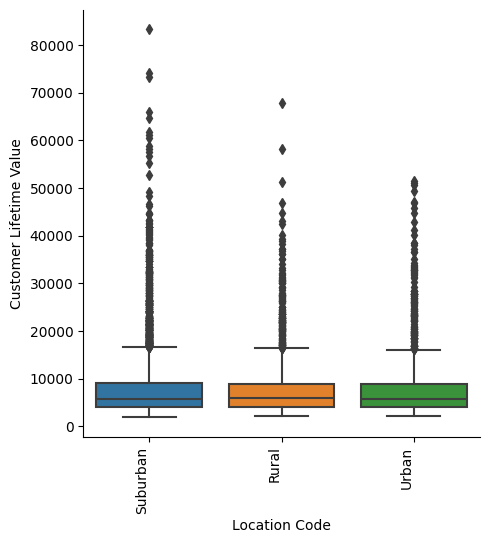

In [48]:
sns.catplot(data=df,
    x="Location Code", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Corporate Auto'),
  Text(1, 0, 'Personal Auto'),
  Text(2, 0, 'Special Auto')])

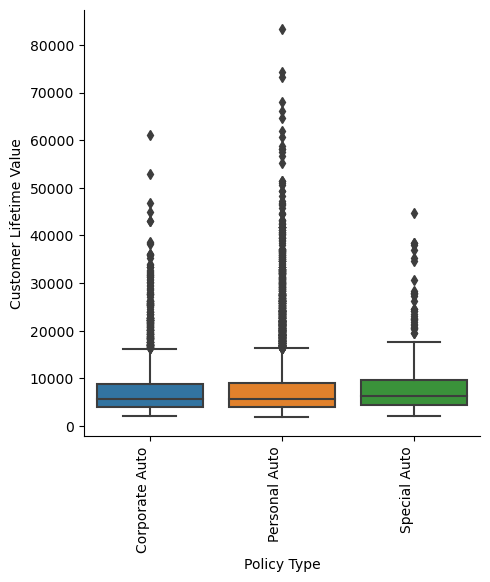

In [59]:
sns.catplot(data=clv,x="Policy Type", y="Customer Lifetime Value", kind="box")
plt.xticks(rotation=90, ha="right")


In [60]:
clv=clv.drop(columns=["Customer","Effective To Date"],axis=1)

In [61]:
clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [62]:
clv2=pd.get_dummies(clv,columns=["State","Response","Coverage","Education","EmploymentStatus","Gender","Location Code","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class","Vehicle Size"])

In [63]:
clv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         9134 non-null   float64
 1   Income                          9134 non-null   int64  
 2   Monthly Premium Auto            9134 non-null   int64  
 3   Months Since Last Claim         9134 non-null   int64  
 4   Months Since Policy Inception   9134 non-null   int64  
 5   Number of Open Complaints       9134 non-null   int64  
 6   Number of Policies              9134 non-null   int64  
 7   Total Claim Amount              9134 non-null   float64
 8   State_Arizona                   9134 non-null   uint8  
 9   State_California                9134 non-null   uint8  
 10  State_Nevada                    9134 non-null   uint8  
 11  State_Oregon                    9134 non-null   uint8  
 12  State_Washington                91

### SPLIT DATA

In [68]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [69]:
## independant variables
x = clv2.drop(['Customer Lifetime Value'], axis=1)
## the dependent variable
y = clv2[['Customer Lifetime Value']]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

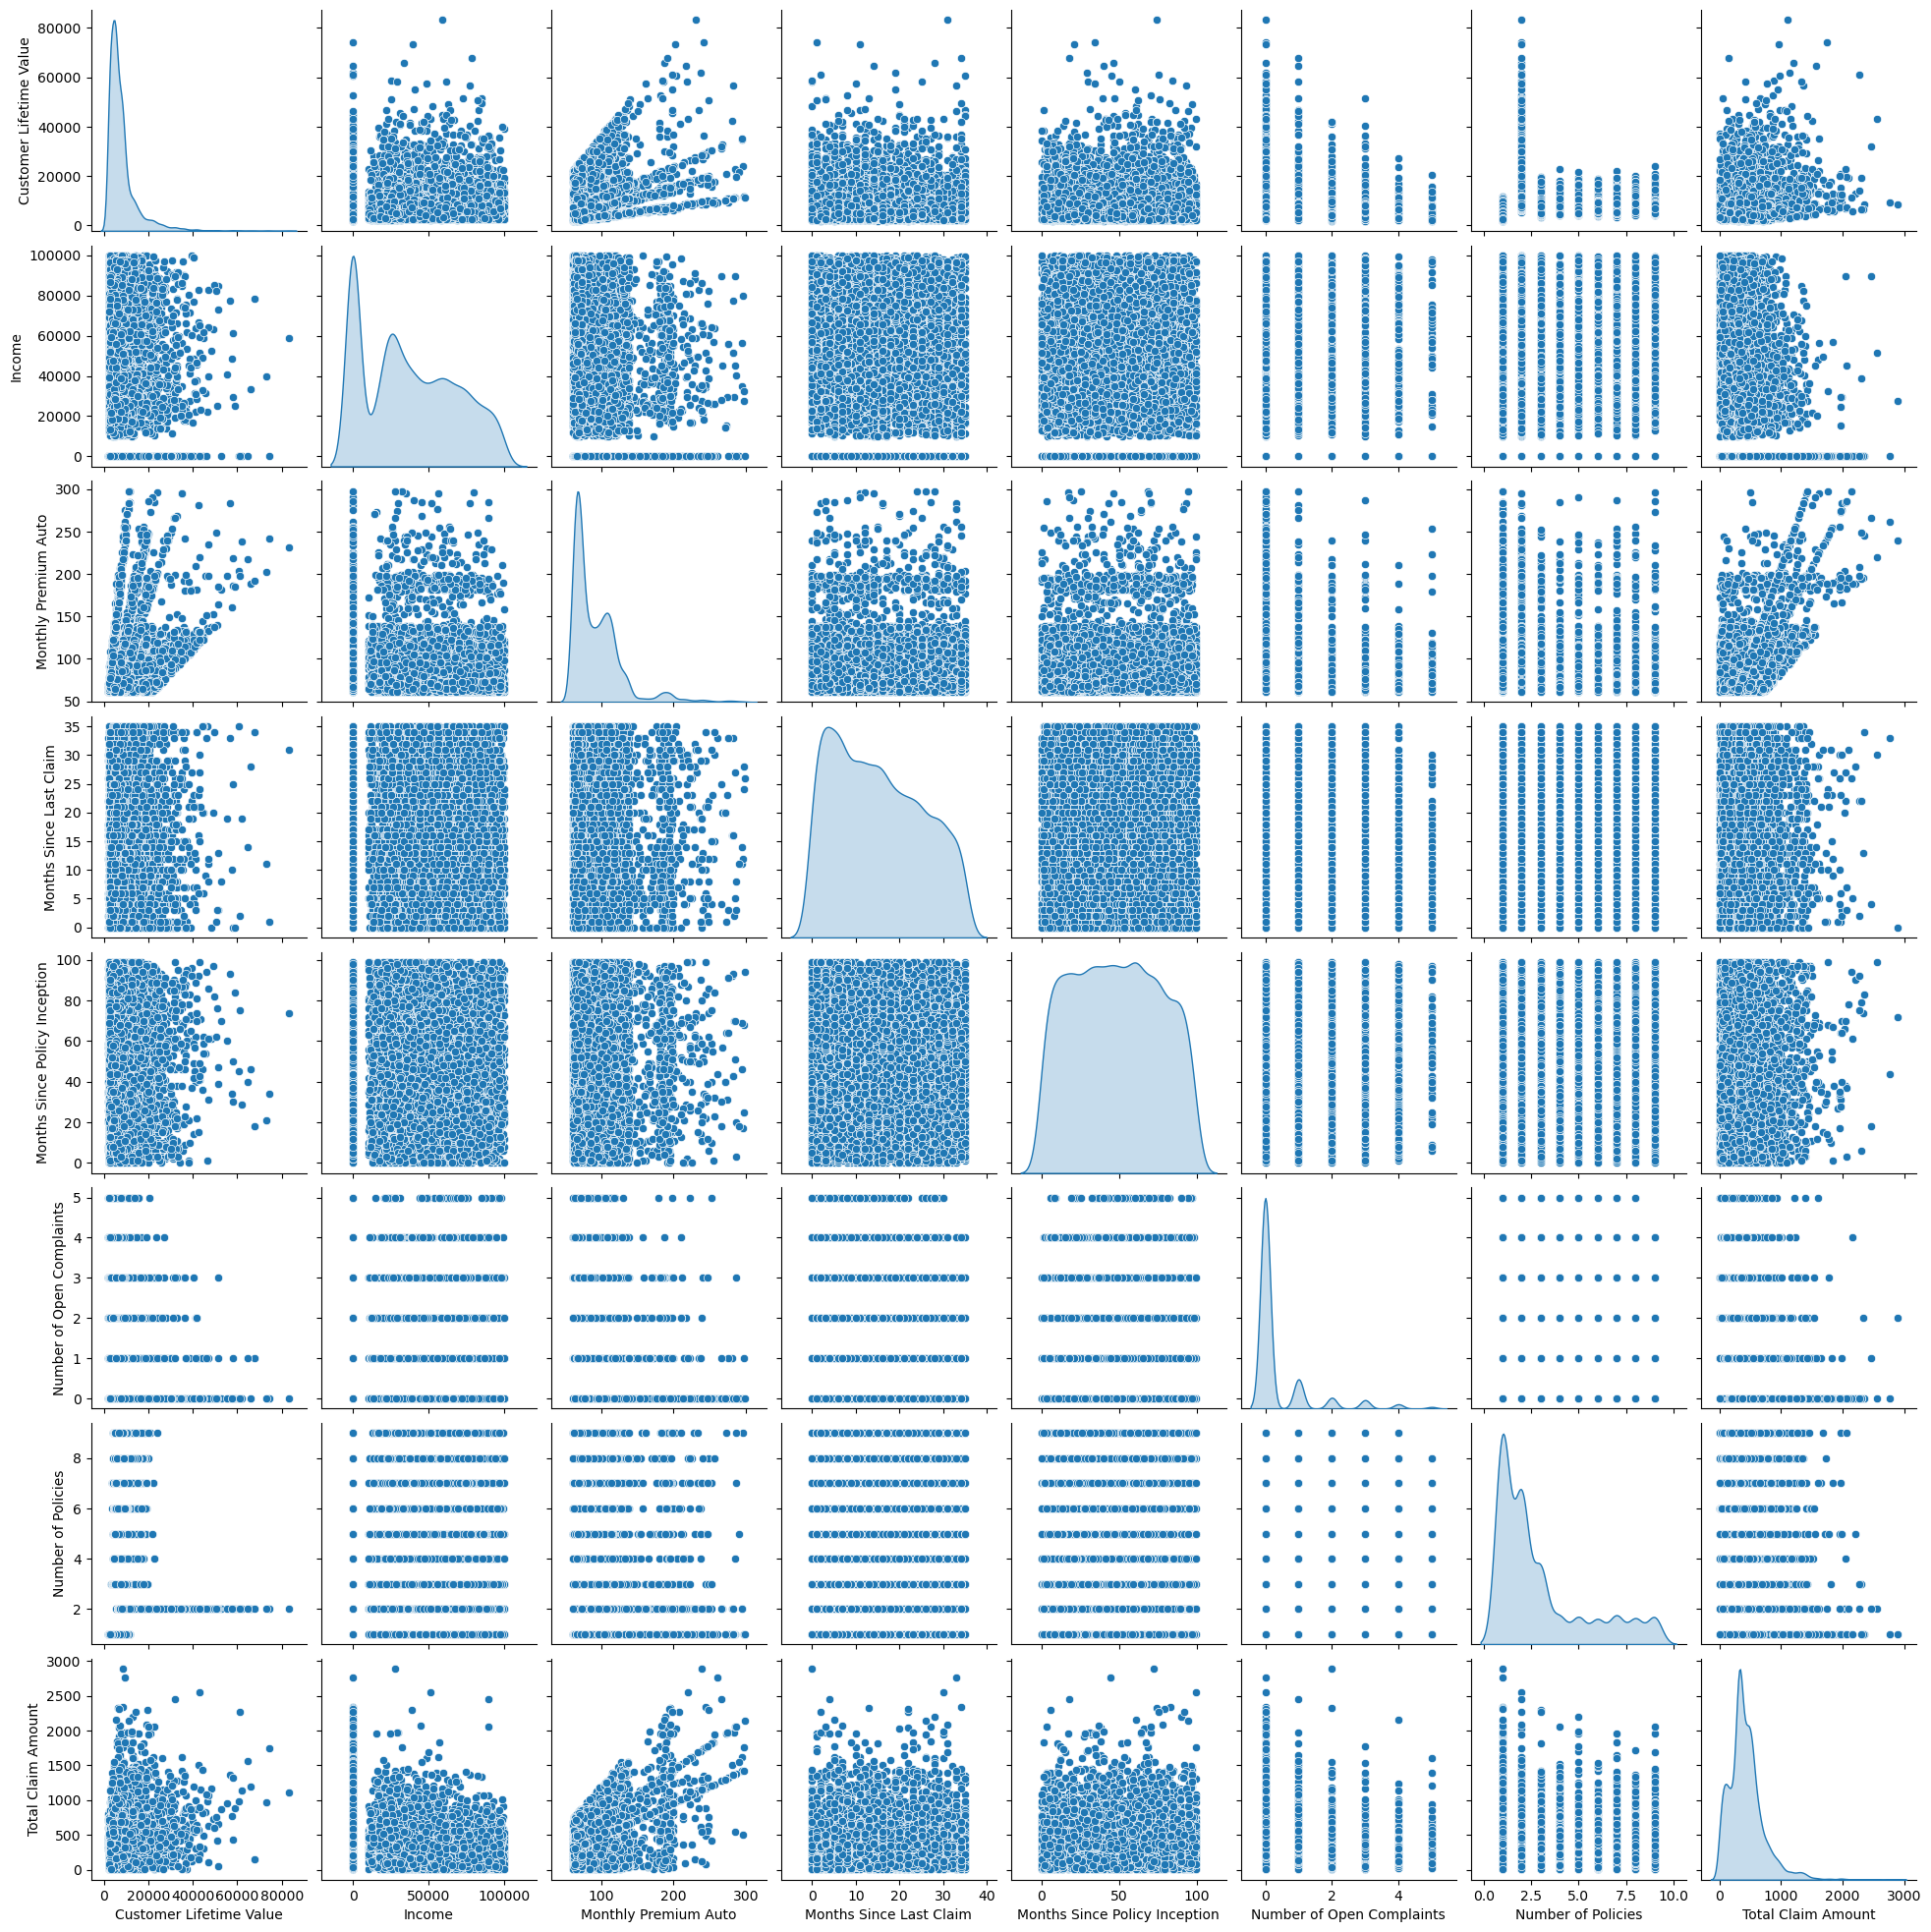

In [72]:
sns.pairplot(clv,diag_kind="kde")

### Mann-Whitney U test

In [73]:
mannwhitneyu(clv2['Response_No'], clv2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [74]:
mannwhitneyu(clv2['Response_Yes'], clv2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [75]:
mannwhitneyu(clv2['EmploymentStatus_Employed'], clv2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [76]:
mannwhitneyu(clv2['Location Code_Rural'], clv2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [77]:
mannwhitneyu(clv2['Policy Type_Corporate Auto'], clv2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [78]:
mannwhitneyu(clv2['Policy_Corporate L3'], clv2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [79]:
mannwhitneyu(clv2['Policy_Special L3'], clv2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

# Kruskal Wallis test

In [84]:
mystate=clv["State"]
myresponse=clv["Response"]
mycoverage=clv["Coverage"]
myeducation=clv["Education"]
myemploymentstatus=clv["EmploymentStatus"]
mygender=clv["Gender"]
mylocationcode=clv["Location Code"]
mymaritalstatus=clv["Marital Status"]
mypolicytype=clv["Policy Type"]
mypolicy=clv["Policy"]
myrenewoffertype=clv["Renew Offer Type"]
mysaleschannel=clv["Sales Channel"]
myvehicleclass=clv["Vehicle Class"]
myvehiclesize=clv["Vehicle Size"]

In [85]:
myCrosstable=pd.crosstab(mystate,myresponse)
myCrosstable

Response,No,Yes
State,,
Arizona,1460,243
California,2694,456
Nevada,758,124
Oregon,2225,376
Washington,689,109


In [86]:
kruskal(mystate,myresponse)

KruskalResult(statistic=1972.131590047541, pvalue=0.0)

In [87]:
myCrosstable2=pd.crosstab(myresponse,mycoverage)
myCrosstable2

Coverage,Basic,Extended,Premium
Response,,,
No,4770,2352,704
Yes,798,390,120


In [88]:
kruskal(myresponse,mycoverage)

KruskalResult(statistic=11011.731386365529, pvalue=0.0)

In [89]:
myCrosstable3=pd.crosstab(myemploymentstatus,myeducation)
myCrosstable3

Education,Bachelor,College,Doctor,High School or Below,Master
EmploymentStatus,,,,,
Disabled,121,98,22,118,46
Employed,1702,1664,249,1528,555
Medical Leave,126,145,17,115,29
Retired,88,102,1,72,19
Unemployed,711,672,53,789,92


In [90]:
kruskal(myemploymentstatus,myeducation)

KruskalResult(statistic=3642.2758854130657, pvalue=0.0)

### Model Building

In [91]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

In [92]:
model_1.score(x_train, y_train)

0.1802253078242121

In [93]:
model_1.score(x_test, y_test)

0.13108006717705856

In [94]:
# fit to a simple linear model

In [95]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model_1.coef_[0][idx]))

The coefficient for Income is -0.002364226544782212
The coefficient for Monthly Premium Auto is 60.4991983581577
The coefficient for Months Since Last Claim is 5.0785449726556635
The coefficient for Months Since Policy Inception is -1.3578794168716968
The coefficient for Number of Open Complaints is -245.91021869975327
The coefficient for Number of Policies is 46.321046738745196
The coefficient for Total Claim Amount is 0.17787822451253987
The coefficient for State_Arizona is -69.4252210682184
The coefficient for State_California is 105.88142407399528
The coefficient for State_Nevada is -148.95560719834788
The coefficient for State_Oregon is 27.54483056692586
The coefficient for State_Washington is 84.95457362565317
The coefficient for Response_No is 262.6089958973249
The coefficient for Response_Yes is -262.6089958973614
The coefficient for Coverage_Basic is -238.76137317513462
The coefficient for Coverage_Extended is 31.723772089920367
The coefficient for Coverage_Premium is 207.0376

In [96]:
intercept = model_1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3141.285454753268


In [97]:
mse=cross_val_score(model_1,x,y,scoring="neg_mean_squared_error",cv=5)

In [98]:
mean_mse=np.mean(mse)
print(mean_mse)

-39930860.03651879


In [99]:
y_pred=model_1.predict(x_test)

In [100]:
print(sqrt(mean_squared_error(y_test,y_pred)))

6157.898533877757


### Ridge and Lasso Regression

In [101]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[-2.36292782e-03  6.09076256e+01  5.07263209e+00 -1.35716617e+00
  -2.45945835e+02  4.63098335e+01  1.78168422e-01 -6.93056243e+01
   1.05827879e+02 -1.48833029e+02  2.74085916e+01  8.49021825e+01
   2.62510590e+02 -2.62510590e+02 -2.29338362e+02  3.27491937e+01
   1.96589169e+02  2.16630123e+01 -3.61621840e+00 -2.29621871e+02
   3.97095824e+02 -1.85520748e+02 -3.31298625e+02  3.53239828e+02
   9.49397601e+01  2.15809717e+02 -3.32690680e+02  5.02173500e+01
  -5.02173500e+01  2.31904207e+01 -2.77131000e+02  2.53940579e+02
  -2.33045128e+01  1.56315380e+02 -1.33010867e+02 -1.61153229e+02
  -1.04860009e+02  2.66013238e+02  5.36401892e+02 -4.37089078e+02
  -2.60466044e+02 -1.06949185e+02  2.98825040e+01 -2.77933277e+01
  -3.02263245e+02 -3.56862429e+02  9.25138913e+02  5.45528127e+02
  -1.98169059e+02  1.67921059e+01 -3.64151174e+02 -5.08320267e+01
   4.52603887e+01  1.26966663e+02 -1.21395025e+02 -1.50260302e+03
   1.56361486e+03  1.43023094e+03 -1.75202748e+02 -1.00659959e+

In [102]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [-2.34964001e-03  6.11927627e+01  5.06460504e+00 -1.35491569e+00
 -2.45839951e+02  4.62801540e+01  1.77417414e-01 -9.59612887e+01
  7.82352970e+01 -1.75150038e+02  0.00000000e+00  5.64756990e+01
  5.24082884e+02 -5.11969945e-14 -2.56165124e+02 -0.00000000e+00
  1.54974873e+02  2.48600890e+01 -0.00000000e+00 -2.24238451e+02
  4.00270409e+02 -1.80836913e+02 -4.24011014e+02  2.57891791e+02
  0.00000000e+00  1.17654913e+02 -4.26912454e+02  9.98879323e+01
 -0.00000000e+00 -0.00000000e+00 -2.99656952e+02  2.30357834e+02
  0.00000000e+00  1.79581884e+02 -1.09134880e+02 -2.12437493e+02
  0.00000000e+00  8.18817350e+01  7.18362527e+02 -2.51883755e+02
 -7.57877734e+01 -7.84994177e+01  5.73235584e+01  0.00000000e+00
  0.00000000e+00 -3.45199546e+01  1.23845772e+03  7.19010989e+02
 -2.42342634e+01  1.90027228e+02 -1.89538958e+02 -6.70597675e+01
  2.83547204e+01  1.09653684e+02 -1.37196719e+02 -1.31569140e+03
  1.71183793e+03  1.57806913e+03 -0.00000000e+00  7.14450128e+01
 -1.02842660

### compare their scores

In [103]:
print(model_1.score(x_train, y_train))
print(model_1.score(x_test, y_test))


0.1802253078242121
0.13108006717705856


In [104]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.18022513680888275
0.13112164609618482


In [105]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.18022471765577797
0.13114906070537335


# Polynomial Regression

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_model2 = linear_model.LinearRegression()

poly_model2.fit(x_train2, y_train)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_model2.score(x_train2, y_train))

0.37423263546226193


In [107]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_model2.score(x_test2, y_test))

-3.697693913709707


# Support Vector Regressor

In [108]:
from sklearn.svm import SVR

In [109]:
svr=SVR()
svr.fit(x_train, y_train) 
svr.score(x_test,y_test)

-0.10039101301165809

In [110]:
print("Support Vector Regressor Accuracy : {:.2f}%".format(svr.score(x_test,y_test)*100))

Support Vector Regressor Accuracy : -10.04%


In [111]:
svr1=SVR(
    kernel='rbf',
    degree=3,
    gamma='auto',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

In [112]:
svr1.fit(x_train, y_train) 
svr1.score(x_test,y_test)

-0.0994232744813397

In [113]:
svr1.fit(x_train, y_train) 
print("SVR Accuracy with Auto : {:.2f}%".format(svr1.score(x_test,y_test)*100))

SVR Accuracy with Auto : -9.94%


In [114]:
y_pred1=svr.predict(x_test)

In [115]:
print(sqrt(mean_squared_error(y_test,y_pred1)))

6929.727643197682


# Decision Tree Regressor

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
dtr=DecisionTreeRegressor(max_depth=6)

In [120]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [121]:
print("Decision Tree Regressor : {:.2f}%".format(dtr.score(x_test,y_test)*100))

Decision Tree Regressor : 66.50%


In [122]:
y_pred2=dtr.predict(x_test)

In [123]:
print(sqrt(mean_squared_error(y_test,y_pred2)))

3823.5312234210833


[Text(0.5, 0.9285714285714286, 'x[5] <= 1.5\nsquared_error = 48727636.976\nsamples = 6393\nvalue = 8046.92'),
 Text(0.25, 0.7857142857142857, 'x[1] <= 124.5\nsquared_error = 1974859.521\nsamples = 2263\nvalue = 3580.027'),
 Text(0.125, 0.6428571428571429, 'x[1] <= 87.5\nsquared_error = 532494.138\nsamples = 1966\nvalue = 3163.816'),
 Text(0.0625, 0.5, 'x[1] <= 72.5\nsquared_error = 91206.936\nsamples = 1254\nvalue = 2684.768'),
 Text(0.03125, 0.35714285714285715, 'x[1] <= 67.5\nsquared_error = 38358.107\nsamples = 872\nvalue = 2542.577'),
 Text(0.015625, 0.21428571428571427, 'x[23] <= 0.5\nsquared_error = 24978.521\nsamples = 530\nvalue = 2446.996'),
 Text(0.0078125, 0.07142857142857142, 'squared_error = 17996.614\nsamples = 199\nvalue = 2296.35'),
 Text(0.0234375, 0.07142857142857142, 'squared_error = 7329.371\nsamples = 331\nvalue = 2537.566'),
 Text(0.046875, 0.21428571428571427, 'x[23] <= 0.5\nsquared_error = 22994.338\nsamples = 342\nvalue = 2690.7'),
 Text(0.0390625, 0.0714285714

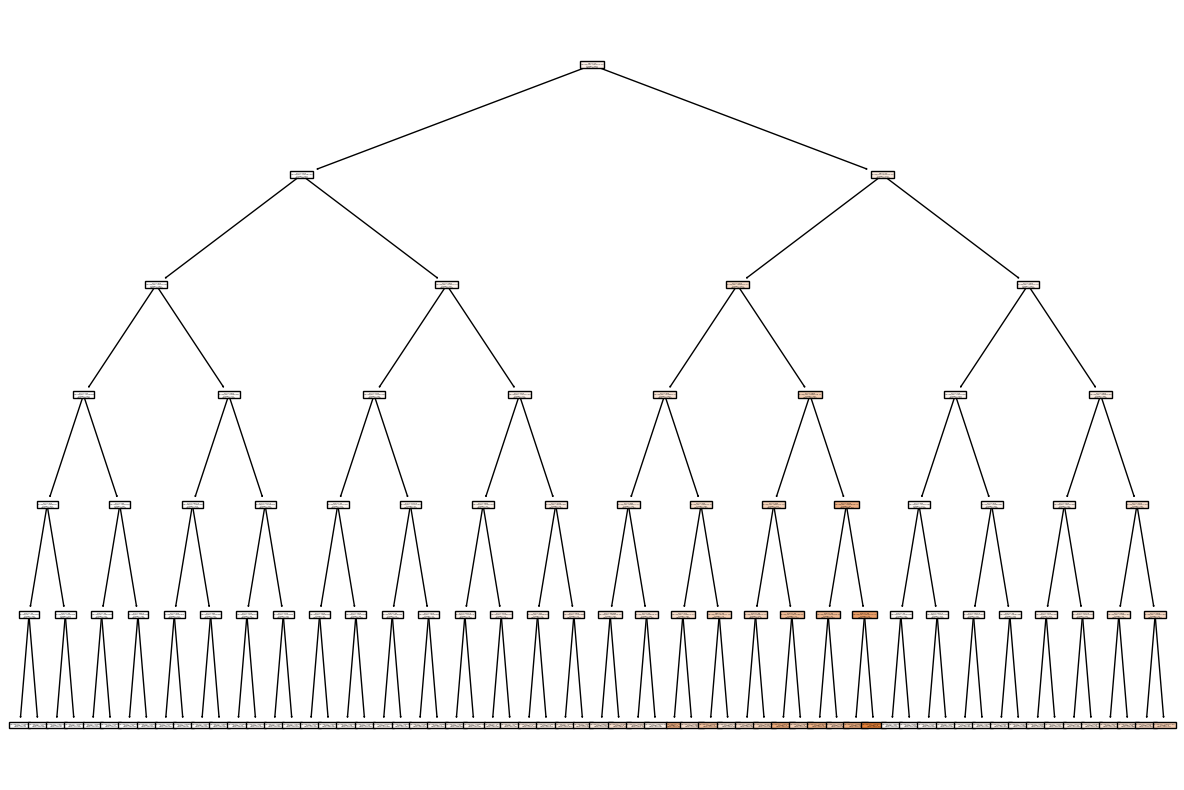

In [124]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtr,filled=True)

# Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf=RandomForestRegressor(n_estimators=1000,random_state=1,max_depth=6)

In [127]:
rf.fit(x_train, y_train)
print("Random Forest Classifier : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Classifier : 69.10%


In [128]:
y_pred3=rf.predict(x_test)

In [129]:
print(sqrt(mean_squared_error(y_test,y_pred3)))

3672.021549849275


# Adaboost

In [130]:
from sklearn.ensemble import AdaBoostRegressor

In [131]:
abr=AdaBoostRegressor()

In [132]:
abr.fit(x_train, y_train)

AdaBoostRegressor()

In [133]:
print(abr.score(x_train, y_train))
print(abr.score(x_test,y_test))

0.5525857619166741
0.5253766020048048


In [134]:
print("Adaboost Regressor : {:.2f}%".format(abr.score(x_test,y_test)*100))

Adaboost Regressor : 52.54%


In [135]:
y_pred6=abr.predict(x_test)

In [136]:
print(sqrt(mean_squared_error(y_test,y_pred6)))

4551.108828864981


### Data Transformation using label encoder

In [137]:
##Data processing fns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [138]:
clv["State"]=le.fit_transform(clv["State"])

In [139]:
clv["Response"]=le.fit_transform(clv["Response"])

In [140]:
clv["Coverage"]=le.fit_transform(clv["Coverage"])

In [141]:
clv["Education"]=le.fit_transform(clv["Education"])

In [142]:
clv["EmploymentStatus"]=le.fit_transform(clv["EmploymentStatus"])

In [143]:
clv["Location Code"]=le.fit_transform(clv["Location Code"])

In [144]:
clv["Marital Status"]=le.fit_transform(clv["Marital Status"])

In [145]:
clv["Policy Type"]=le.fit_transform(clv["Policy Type"])

In [146]:
clv["Policy"]=le.fit_transform(clv["Policy"])

In [147]:
clv["Renew Offer Type"]=le.fit_transform(clv["Renew Offer Type"])

In [148]:
clv["Sales Channel"]=le.fit_transform(clv["Sales Channel"])

In [150]:
clv["Vehicle Class"]=le.fit_transform(clv["Vehicle Class"])

In [151]:
clv["Vehicle Size"]=le.fit_transform(clv["Vehicle Size"])

In [152]:
clv["Gender"]=le.fit_transform(clv["Gender"])

In [153]:
clv.dtypes

State                              int32
Customer Lifetime Value          float64
Response                           int32
Coverage                           int32
Education                          int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Renew Offer Type                   int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int64
dtype: object

In [154]:
# lets build our linear model
# independant variables
X = clv.drop(['Customer Lifetime Value'], axis=1)
# the dependent variable
Y = clv[['Customer Lifetime Value']]

In [155]:
# Split x and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=0)

In [156]:
model_2 = LinearRegression()
model_2.fit(X_train, Y_train)

LinearRegression()

In [157]:
model_2.score(X_train, Y_train)

0.17578211591653004

In [158]:
model_2.score(X_test, Y_test)

0.1318960907253408

In [159]:
y_pred8=model_2.predict(X_test)

In [160]:
print(sqrt(mean_squared_error(Y_test,y_pred8)))

6155.006339586761


In [161]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_model2 = linear_model.LinearRegression()

poly_model2.fit(X_train2, Y_train)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_model2.score(X_train2, Y_train))

0.2204566475973304


In [162]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_model2.score(X_test2, Y_test))

0.12162748129552026


In [163]:
from sklearn.svm import SVR

In [164]:
svr3=SVR()
svr3.fit(X_train, Y_train) 
svr3.score(X_test,Y_test)

-0.10039687863536528

In [165]:
print("Support Vector Regressor Accuracy : {:.2f}%".format(svr3.score(X_test,Y_test)*100))

Support Vector Regressor Accuracy : -10.04%


In [166]:
svr4=SVR(
    kernel='rbf',
    degree=3,
    gamma='auto',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

In [167]:
svr4.fit(X_train, Y_train) 
svr4.score(X_test,Y_test)

-0.09944980640198375

In [168]:
svr4.fit(X_train, Y_train) 
print("SVR Accuracy with Auto : {:.2f}%".format(svr4.score(X_test,Y_test)*100))

SVR Accuracy with Auto : -9.94%
